# Evaluation test

$$
\vec{B} = B_x \hat{x} + B_y \hat{y} + B_z \hat{z}
$$

$$
B_x = x^3, \quad B_y = -3x^2 y, \quad B_z = xy
$$

$$
\nabla \cdot \vec{B} = 0
$$

$$
\vec{J} = \nabla \times \vec{B} = x \hat{x} - y \hat{y} - 6xy \hat{z}
$$

$$
\nabla^2 \vec{B} = 6x \hat{x} - 6y \hat{y}
$$

## Test 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Nx, Ny, Nz = 4, 5, 6

In [ ]:
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
z = np.linspace(0, 1, Nz)

In [ ]:
xv, yv, zv = np.meshgrid(x, y, z, indexing='ij')

In [ ]:
r = np.stack([xv, yv, zv], axis=-1)

In [ ]:
r.shape

(4, 5, 6, 3)

In [ ]:
def mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    Bx = x**3
    By = -3*(x**2)*y 
    Bz = x*y 
    return np.stack([Bx, By, Bz], axis=-1)

def norm_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.sqrt(x**6 + 9*(x**4)*(y**2) + (x**2)*(y**2))
    return scalar_value

def grad_Bx(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = 3*(x**2)
    y_comp = np.zeros_like(y)
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def grad_By(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = -6*x*y
    y_comp = -3*(x**2)
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def grad_Bz(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = y
    y_comp = x
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def laplacian_Bx(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = 6*x
    return scalar_value

def laplacian_By(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    sclar_value = -6*y
    return sclar_value

def laplacian_Bz(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.zeros_like(x)
    return scalar_value

def divergence_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.zeros_like(x)
    return scalar_value

def curl_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = x
    y_comp = -y 
    z_comp = -6*x*y 
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def laplacian_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = 6*x
    y_comp = -6*y 
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

In [ ]:
B = mag(r)

Laplacian_Bx = laplacian_Bx(r)
Laplacian_By = laplacian_By(r)
Laplacian_Bz = laplacian_Bz(r)

divergence_B = divergence_mag(r)
curl_B = curl_mag(r)
Laplacian_Bx = laplacian_mag(r)

In [ ]:
B_norm = norm_mag(r)
B_norm.shape

(4, 5, 6)

In [ ]:
numerical_B_norm = np.sqrt((B**2).sum(-1))
numerical_B_norm.shape

(4, 5, 6)

In [ ]:
np.allclose(B_norm, numerical_B_norm)

True

In [ ]:
Bx = B[..., 0]
By = B[..., 1]
Bz = B[..., 2]

In [ ]:
gradient_Bx = grad_Bx(r)
gradient_Bx.shape

(4, 5, 6, 3)

In [ ]:
dx, dy, dz = np.diff(x)[0], np.diff(y)[0], np.diff(z)[0]
dx, dy, dz

(0.3333333333333333, 0.25, 0.2)

In [ ]:
numerical_dBx_dx, numerical_dBx_dy, numerical_dBx_dz = np.gradient(Bx, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
numerical_gradient_Bx = np.stack([numerical_dBx_dx, numerical_dBx_dy, numerical_dBx_dz], axis=-1)
numerical_gradient_Bx.shape

(4, 5, 6, 3)

In [ ]:
gradient_Bx[..., 0]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]],

       [[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333]],

       [[1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
         1.333333

In [ ]:
numerical_gradient_Bx[..., 0]

array([[[-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222]],

       [[ 0.44444444,  0.44444444,  0.44444444,  0.44444444,
          0.44444444,  0.44444444],
        [ 0.44444444,  0.44444444,  0.44444444,  0.44444444,
          0.44444444,  0.44444444],
        [ 0.44444444,  0.44444444,  0.44444444,  0.44444444,
          0.44444444,  0.44444444],
        [ 0.44444444,  0.44444444,  0.44444444,  0.44444444,
          0.44444444,  0.44444444],
        [ 0.44444444,  0.44444444,  0.44444444,  0.44444444,
          0.44444444,  0.44444444]],

       [[ 1.44444444,  1.4

In [ ]:
gradient_By = grad_By(r)
gradient_By.shape

(4, 5, 6, 3)

In [ ]:
numerical_dBy_dx, numerical_dBy_dy, numerical_dBy_dz = np.gradient(By, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
numerical_gradient_By = np.stack([numerical_dBy_dx, numerical_dBy_dy, numerical_dBy_dz], axis=-1)
numerical_gradient_By.shape

(4, 5, 6, 3)

In [ ]:
gradient_By[..., 0]

array([[[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [-1. , -1. , -1. , -1. , -1. , -1. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-2. , -2. , -2. , -2. , -2. , -2. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1. , -1. , -1. , -1. , -1. , -1. ],
        [-2. , -2. , -2. , -2. , -2. , -2. ],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4. , -4. , -4. , -4. , -4. , -4. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-6. , -6. , -6. , -6. , -6. , -6. ]]])

In [ ]:
numerical_gradient_By[..., 0]

array([[[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ]],

       [[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [-1. , -1. , -1. , -1. , -1. , -1. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-2. , -2. , -2. , -2. , -2. , -2. ]],

       [[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-1. , -1. , -1. , -1. , -1. , -1. ],
        [-2. , -2. , -2. , -2. , -2. , -2. ],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4. , -4. , -4. , -4. , -4. , -4. ]],

       [[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-6. , -6. , -6. , -6. , -6. , -6. ]]])

In [ ]:
gradient_By[..., 1]

array([[[-0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        ]],

       [[-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333]],

       [[-1.33333333, -1.3

In [ ]:
numerical_gradient_By[..., 1]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ]],

       [[-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333, -0.33333333]],

       [[-1.33333333, -1.3

In [ ]:
gradient_Bz = grad_Bz(r)
gradient_Bz.shape

(4, 5, 6, 3)

In [ ]:
numerical_dBz_dx, numerical_dBz_dy, numerical_dBz_dz = np.gradient(Bz, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
numerical_gradient_Bz = np.stack([numerical_dBz_dx, numerical_dBz_dy, numerical_dBz_dz], axis=-1)
numerical_gradient_Bz.shape

(4, 5, 6, 3)

In [ ]:
gradient_Bz[..., 0]

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]]])

In [ ]:
numerical_gradient_Bz[..., 0]

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
        [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]]])

In [ ]:
gradient_Bz[..., 1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]],

       [[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333]],

       [[0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
         0.666666

In [ ]:
numerical_gradient_Bz[..., 1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]],

       [[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333]],

       [[0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
         0.666666

In [ ]:
Laplacian_Bx = laplacian_Bx(r)
Laplacian_Bx.shape

(4, 5, 6)

In [ ]:
Laplacian_Bx

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2.]],

       [[4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4.]],

       [[6., 6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6., 6.]]])

In [ ]:
numerical_laplacian_Bx = np.gradient(numerical_gradient_Bx[..., 0], dx, axis=[0], edge_order=2) + np.gradient(numerical_gradient_Bx[..., 1], dy, axis=[1], edge_order=2) + np.gradient(numerical_gradient_Bx[..., 2], dz, axis=[2], edge_order=2)
numerical_laplacian_Bx.shape

(4, 5, 6)

In [ ]:
numerical_laplacian_Bx

array([[[1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
        [1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
        [1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
        [1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
        [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]],

       [[2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
        [2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
        [2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
        [2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
        [2.5, 2.5, 2.5, 2.5, 2.5, 2.5]],

       [[3.5, 3.5, 3.5, 3.5, 3.5, 3.5],
        [3.5, 3.5, 3.5, 3.5, 3.5, 3.5],
        [3.5, 3.5, 3.5, 3.5, 3.5, 3.5],
        [3.5, 3.5, 3.5, 3.5, 3.5, 3.5],
        [3.5, 3.5, 3.5, 3.5, 3.5, 3.5]],

       [[4.5, 4.5, 4.5, 4.5, 4.5, 4.5],
        [4.5, 4.5, 4.5, 4.5, 4.5, 4.5],
        [4.5, 4.5, 4.5, 4.5, 4.5, 4.5],
        [4.5, 4.5, 4.5, 4.5, 4.5, 4.5],
        [4.5, 4.5, 4.5, 4.5, 4.5, 4.5]]])

In [ ]:
Laplacian_By = laplacian_By(r)
Laplacian_By.shape

(4, 5, 6)

In [ ]:
Laplacian_By

array([[[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-6. , -6. , -6. , -6. , -6. , -6. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-6. , -6. , -6. , -6. , -6. , -6. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-6. , -6. , -6. , -6. , -6. , -6. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-6. , -6. , -6. , -6. , -6. , -6. ]]])

In [ ]:
numerical_laplacian_By = np.gradient(numerical_gradient_By[..., 0], dx, axis=[0], edge_order=2) + np.gradient(numerical_gradient_By[..., 1], dy, axis=[1], edge_order=2) + np.gradient(numerical_gradient_By[..., 2], dz, axis=[2], edge_order=2)
numerical_laplacian_By.shape

(4, 5, 6)

In [ ]:
numerical_laplacian_By

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
         -1.50000000e+00, -1.50000000e+00, -1.50000000e+00],
        [-3.00000000e+00, -3.00000000e+00, -3.00000000e+00,
         -3.00000000e+00, -3.00000000e+00, -3.00000000e+00],
        [-4.50000000e+00, -4.50000000e+00, -4.50000000e+00,
         -4.50000000e+00, -4.50000000e+00, -4.50000000e+00],
        [-6.00000000e+00, -6.00000000e+00, -6.00000000e+00,
         -6.00000000e+00, -6.00000000e+00, -6.00000000e+00]],

       [[ 2.22044605e-16,  2.22044605e-16,  2.22044605e-16,
          2.22044605e-16,  2.22044605e-16,  2.22044605e-16],
        [-1.50000000e+00, -1.50000000e+00, -1.50000000e+00,
         -1.50000000e+00, -1.50000000e+00, -1.50000000e+00],
        [-3.00000000e+00, -3.00000000e+00, -3.00000000e+00,
         -3.00000000e+00, -3.00000000e+00, -3.00000000e+00],
        [-4.50000000e+00, -4.5

In [ ]:
Laplacian_Bz = laplacian_Bz(r)
Laplacian_Bz.shape

(4, 5, 6)

In [ ]:
Laplacian_Bz

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [ ]:
numerical_laplacian_Bz = np.gradient(numerical_gradient_Bz[..., 0], dx, axis=[0], edge_order=2) + np.gradient(numerical_gradient_Bz[..., 1], dy, axis=[1], edge_order=2) + np.gradient(numerical_gradient_Bz[..., 2], dz, axis=[2], edge_order=2)
numerical_laplacian_Bz.shape

(4, 5, 6)

In [ ]:
numerical_laplacian_Bz

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
         -1.11022302e-16, -1.11022302e-16, -1.11022302e-16],
        [-2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
         -2.22044605e-16, -2.22044605e-16, -2.22044605e-16],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-4.44089210e-16, -4.44089210e-16, -4.44089210e-16,
         -4.44089210e-16, -4.44089210e-16, -4.44089210e-16]],

       [[-2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
         -2.22044605e-16, -2.22044605e-16, -2.22044605e-16],
        [ 6.10622664e-16,  3.33066907e-16,  1.94289029e-16,
          1.94289029e-16,  1.94289029e-16,  1.94289029e-16],
        [ 9.99200722e-16,  4.44089210e-16,  1.66533454e-16,
          1.66533454e-16,  1.66533454e-16,  1.66533454e-16],
        [-2.22044605e-16, -2.2

In [ ]:
laplacian_B = laplacian_mag(r)
laplacian_B.shape

(4, 5, 6, 3)

In [ ]:
numerical_laplacian_B = np.stack([numerical_laplacian_Bx, numerical_laplacian_By, numerical_laplacian_Bz], axis=-1)
numerical_laplacian_B.shape

(4, 5, 6, 3)

<matplotlib.image.AxesImage>

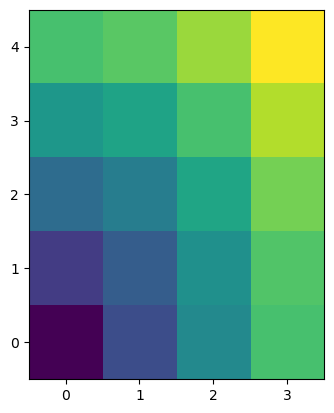

In [ ]:
plt.imshow(np.sqrt((laplacian_B**2).sum(-1)).sum(2).T, origin='lower')

<matplotlib.image.AxesImage>

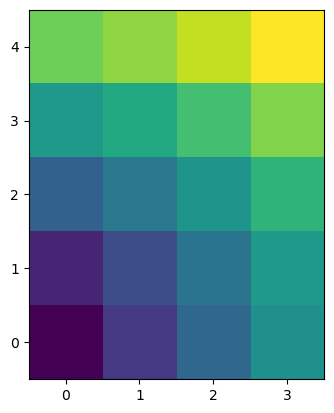

In [ ]:
plt.imshow(np.sqrt((numerical_laplacian_B**2).sum(-1)).sum(2).T, origin='lower')

In [ ]:
divergence_B = divergence_mag(r)
divergence_B.shape

(4, 5, 6)

In [ ]:
divergence_B

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [ ]:
numerical_divergence_B = numerical_gradient_Bx[..., 0] + numerical_gradient_By[..., 1] + numerical_gradient_Bz[..., 2]
numerical_divergence_B.shape

(4, 5, 6)

In [ ]:
numerical_divergence_B

array([[[-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222],
        [-0.22222222, -0.22222222, -0.22222222, -0.22222222,
         -0.22222222, -0.22222222]],

       [[ 0.11111111,  0.11111111,  0.11111111,  0.11111111,
          0.11111111,  0.11111111],
        [ 0.11111111,  0.11111111,  0.11111111,  0.11111111,
          0.11111111,  0.11111111],
        [ 0.11111111,  0.11111111,  0.11111111,  0.11111111,
          0.11111111,  0.11111111],
        [ 0.11111111,  0.11111111,  0.11111111,  0.11111111,
          0.11111111,  0.11111111],
        [ 0.11111111,  0.11111111,  0.11111111,  0.11111111,
          0.11111111,  0.11111111]],

       [[ 0.11111111,  0.1

In [ ]:
curl_B = curl_mag(r)
curl_B.shape

(4, 5, 6, 3)

<matplotlib.image.AxesImage>

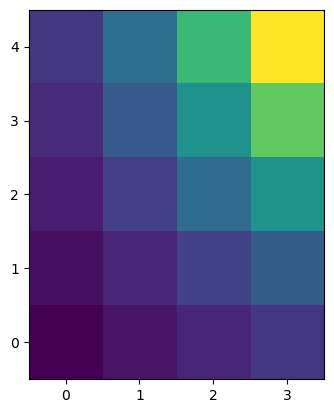

In [ ]:
plt.imshow(np.sqrt((curl_B**2).sum(-1)).sum(2).T, origin='lower')

In [ ]:
curl_B[..., 2]

array([[[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0. , -0. , -0. , -0. , -0. , -0. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [-1. , -1. , -1. , -1. , -1. , -1. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-2. , -2. , -2. , -2. , -2. , -2. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1. , -1. , -1. , -1. , -1. , -1. ],
        [-2. , -2. , -2. , -2. , -2. , -2. ],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4. , -4. , -4. , -4. , -4. , -4. ]],

       [[-0. , -0. , -0. , -0. , -0. , -0. ],
        [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
        [-3. , -3. , -3. , -3. , -3. , -3. ],
        [-4.5, -4.5, -4.5, -4.5, -4.5, -4.5],
        [-6. , -6. , -6. , -6. , -6. , -6. ]]])

In [ ]:
numerical_curl_B = np.stack([numerical_gradient_Bz[..., 1] - numerical_gradient_By[..., 2], numerical_gradient_Bx[..., 2] - numerical_gradient_Bz[..., 0], numerical_gradient_By[..., 0] - numerical_gradient_Bx[..., 1]], axis=-1)
numerical_curl_B.shape

(4, 5, 6, 3)

In [ ]:
numerical_curl_B[..., 2]

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.38777878e-17, -1.38777878e-17, -1.38777878e-17,
         -1.38777878e-17, -1.38777878e-17, -1.38777878e-17],
        [-5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
         -5.00000000e-01, -5.00000000e-01, -5.00000000e-01],
        [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        [-1.50000000e+00, -1.5

<matplotlib.image.AxesImage>

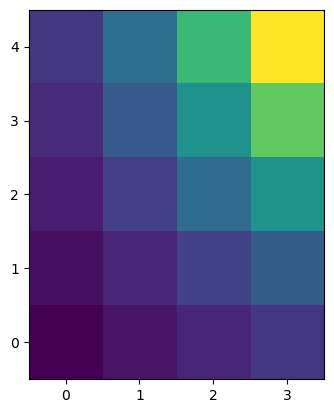

In [ ]:
plt.imshow(np.sqrt((numerical_curl_B**2).sum(-1)).sum(2).T, origin='lower')

## Test 2 (Define functions)

In [ ]:
import numpy as np

In [ ]:
def magnitude(vector):
    return np.sqrt((vector**2).sum(-1))

def gradient(scalar, dx=None, dy=None, dz=None):

    if (dx is not None) and (dy is not None) and (dz is not None):
        Dx_scalar, Dy_scalar, Dz_scalar = np.gradient(scalar, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
    else:
        Dx_scalar, Dy_scalar, Dz_scalar = np.gradient(scalar, axis=[0, 1, 2], edge_order=2)

    return np.stack([Dx_scalar, Dy_scalar, Dz_scalar], axis=-1)
    
def divergence(vector, dx=None, dy=None, dz=None):
    vector_x, vector_y, vector_z = vector[..., 0], vector[..., 1], vector[..., 2]

    if (dx is not None) and (dy is not None) and (dz is not None):
        Dx_vector_x = np.gradient(vector_x, dx, axis=[0], edge_order=2)
        Dy_vector_y = np.gradient(vector_y, dy, axis=[1], edge_order=2)
        Dz_vector_z = np.gradient(vector_z, dz, axis=[2], edge_order=2)
    else:
        Dx_vector_x = np.gradient(vector_x, axis=[0], edge_order=2)
        Dy_vector_y = np.gradient(vector_y, axis=[1], edge_order=2)
        Dz_vector_z = np.gradient(vector_z, axis=[2], edge_order=2)

    return Dx_vector_x + Dy_vector_y + Dz_vector_z

def curl(vector, dx=None, dy=None, dz=None):
    vector_x, vector_y, vector_z = vector[..., 0], vector[..., 1], vector[..., 2]

    if (dx is not None) and (dy is not None) and (dz is not None):
        Dy_vector_x, Dz_vector_x = np.gradient(vector_x, dy, dz, axis=[1, 2], edge_order=2)
        Dx_vector_y, Dz_vector_y = np.gradient(vector_y, dx, dz, axis=[0, 2], edge_order=2)
        Dx_vector_z, Dy_vector_z = np.gradient(vector_z, dx, dy, axis=[0, 1], edge_order=2)
    else:
        Dy_vector_x, Dz_vector_x = np.gradient(vector_x, axis=[1, 2], edge_order=2)
        Dx_vector_y, Dz_vector_y = np.gradient(vector_y, axis=[0, 2], edge_order=2)
        Dx_vector_z, Dy_vector_z = np.gradient(vector_z, axis=[0, 1], edge_order=2)
    
    curl_x = Dy_vector_z - Dz_vector_y 
    curl_y = Dz_vector_x - Dx_vector_z
    curl_z = Dx_vector_y - Dy_vector_x

    return np.stack([curl_x, curl_y, curl_z], axis=-1)

def laplacian(scalar, dx=None, dy=None, dz=None):
    if (dx is not None) and (dy is not None) and (dz is not None):
        gradient_scalar = gradient(scalar, dx, dy, dz)
        Dx_scalar = gradient_scalar[..., 0]
        Dy_scalar = gradient_scalar[..., 1]
        Dz_scalar = gradient_scalar[..., 2]

        Dx_Dx_scalar = np.gradient(Dx_scalar, dx, axis=[0], edge_order=2)
        Dy_Dy_scalar = np.gradient(Dy_scalar, dy, axis=[1], edge_order=2)
        Dz_Dz_scalar = np.gradient(Dz_scalar, dz, axis=[2], edge_order=2)
    else:
        gradient_scalar = gradient(scalar)
        Dx_scalar = gradient_scalar[..., 0]
        Dy_scalar = gradient_scalar[..., 1]
        Dz_scalar = gradient_scalar[..., 2]

        Dx_Dx_scalar = np.gradient(Dx_scalar, axis=[0], edge_order=2)
        Dy_Dy_scalar = np.gradient(Dy_scalar, axis=[1], edge_order=2)
        Dz_Dz_scalar = np.gradient(Dz_scalar, axis=[2], edge_order=2)

    return Dx_Dx_scalar + Dy_Dy_scalar + Dz_Dz_scalar

def laplacian_vector(vector, dx=None, dy=None, dz=None):
    vector_x, vector_y, vector_z = vector[..., 0], vector[..., 1], vector[..., 2]

    if (dx is not None) and (dy is not None) and (dz is not None):
        laplacian_vector_x = laplacian(vector_x, dx, dy, dz)
        laplacian_vector_y = laplacian(vector_y, dx, dy, dz)
        laplacian_vector_z = laplacian(vector_z, dx, dy, dz)
    else:
        laplacian_vector_x = laplacian(vector_x)
        laplacian_vector_y = laplacian(vector_y)
        laplacian_vector_z = laplacian(vector_z)

    return np.stack([laplacian_vector_x, laplacian_vector_y, laplacian_vector_z], axis=-1)

In [ ]:
def vector_map(vector):
    return magnitude(vector).sum(2).T

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Nx, Ny, Nz = 64, 128, 256

In [ ]:
x = np.linspace(0, 1, Nx)
y = np.linspace(2, 4, Ny)
z = np.linspace(5, 9, Nz)

In [ ]:
dx, dy, dz = np.diff(x)[0], np.diff(y)[0], np.diff(z)[0]
dx, dy, dz

(0.015873015873015872, 0.015748031496062964, 0.015686274509803866)

In [ ]:
xv, yv, zv = np.meshgrid(x, y, z, indexing='ij')

In [ ]:
r = np.stack([xv, yv, zv], axis=-1)
r.shape

(64, 128, 256, 3)

In [ ]:
def mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    Bx = x**3
    By = -3*(x**2)*y 
    Bz = x*y 
    return np.stack([Bx, By, Bz], axis=-1)

def norm_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.sqrt(x**6 + 9*(x**4)*(y**2) + (x**2)*(y**2))
    return scalar_value

def grad_Bx(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = 3*(x**2)
    y_comp = np.zeros_like(y)
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def grad_By(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = -6*x*y
    y_comp = -3*(x**2)
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def grad_Bz(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = y
    y_comp = x
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def laplacian_Bx(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = 6*x
    return scalar_value

def laplacian_By(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    sclar_value = -6*y
    return sclar_value

def laplacian_Bz(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.zeros_like(x)
    return scalar_value

def divergence_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    scalar_value = np.zeros_like(x)
    return scalar_value

def curl_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = x
    y_comp = -y 
    z_comp = -6*x*y 
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

def laplacian_mag(r):
    x, y, z = r[..., 0], r[..., 1], r[..., 2]
    x_comp = 6*x
    y_comp = -6*y 
    z_comp = np.zeros_like(z)
    return np.stack([x_comp, y_comp, z_comp], axis=-1)

In [ ]:
B = mag(r)
Bx = B[..., 0]
By = B[..., 1]
Bz = B[..., 2]

$$
|\vec{B}|
$$

In [ ]:
B_norm = norm_mag(r)
B_norm.sum(), B_norm.shape

(7203061.520412949, (64, 128, 256))

In [ ]:
B_norm_nu = magnitude(B)
B_norm_nu.sum(), B_norm_nu.shape

(7203061.520412949, (64, 128, 256))

In [ ]:
np.allclose(B_norm, B_norm_nu)

True

$$
\nabla B_x
$$

In [ ]:
gradient_Bx = grad_Bx(r)
magnitude(gradient_Bx).sum(), gradient_Bx.shape

(2113796.0634920653, (64, 128, 256, 3))

In [ ]:
gradient_Bx_nu = gradient(Bx, dx, dy, dz)
magnitude(gradient_Bx).sum(), gradient_Bx.shape

(2113796.0634920653, (64, 128, 256, 3))

In [ ]:
np.allclose(gradient_Bx, gradient_Bx_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

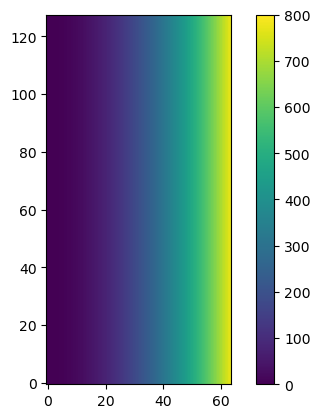

In [ ]:
plt.imshow(vector_map(gradient_Bx), origin='lower', vmin=0, vmax=800)
plt.colorbar()

<matplotlib.colorbar.Colorbar>

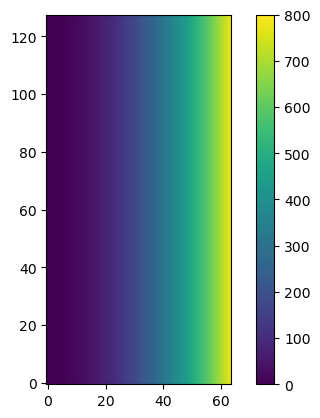

In [ ]:
plt.imshow(vector_map(gradient_Bx_nu), origin='lower', vmin=0, vmax=800)
plt.colorbar()

$$
\nabla B_y
$$

In [ ]:
gradient_By = grad_By(r)
magnitude(gradient_By).sum(), gradient_By.shape

(19012114.949136302, (64, 128, 256, 3))

In [ ]:
gradient_By_nu = gradient(By, dx, dy, dz)
magnitude(gradient_By).sum(), gradient_By.shape

(19012114.949136302, (64, 128, 256, 3))

In [ ]:
np.allclose(gradient_By, gradient_By_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

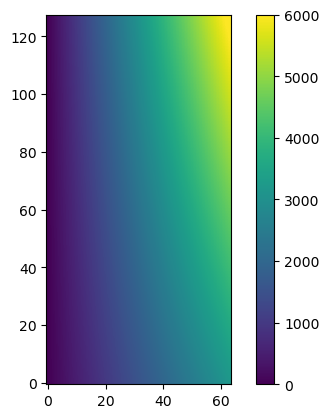

In [ ]:
plt.imshow(vector_map(gradient_By), origin='lower', vmin=0, vmax=6000)
plt.colorbar()

<matplotlib.colorbar.Colorbar>

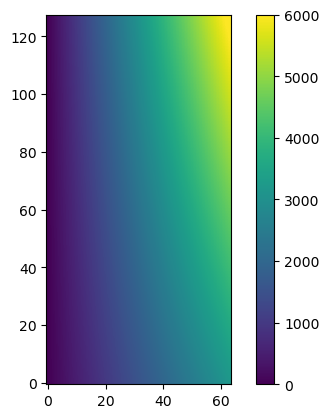

In [ ]:
plt.imshow(vector_map(gradient_By_nu), origin='lower', vmin=0, vmax=6000)
plt.colorbar()

$$
\nabla B_z
$$

In [ ]:
gradient_Bz = grad_Bz(r)
magnitude(gradient_Bz).sum(), gradient_Bz.shape

(6411239.104395364, (64, 128, 256, 3))

In [ ]:
gradient_Bz_nu = gradient(Bz, dx, dy, dz)
magnitude(gradient_Bz).sum(), gradient_Bz.shape

(6411239.104395364, (64, 128, 256, 3))

In [ ]:
np.allclose(gradient_Bz, gradient_Bz_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

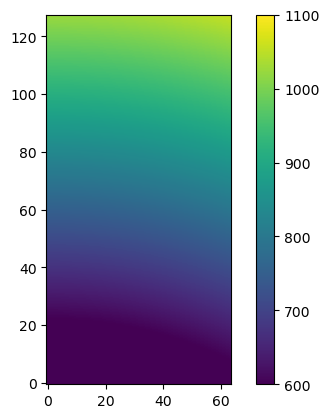

In [ ]:
plt.imshow(vector_map(gradient_Bz), origin='lower', vmin=600, vmax=1100)
plt.colorbar()

<matplotlib.colorbar.Colorbar>

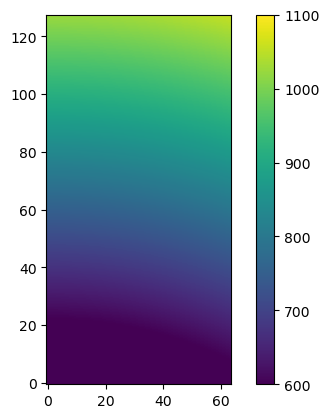

In [ ]:
plt.imshow(vector_map(gradient_Bz_nu), origin='lower', vmin=600, vmax=1100)
plt.colorbar()

$$
\nabla \cdot \vec{B}
$$

In [ ]:
divergence_B = divergence_mag(r)
divergence_B.sum(), divergence_B.shape

(0.0, (64, 128, 256))

In [ ]:
divergence_B_nu = divergence(B, dx, dy, dz)
divergence_B_nu.sum(), divergence_B_nu.shape

(478.84706474790477, (64, 128, 256))

In [ ]:
np.allclose(divergence_B, divergence_B_nu, atol=1e-3)

True

$$
\nabla \times \vec{B}
$$

In [ ]:
curl_B = curl_mag(r)
magnitude(curl_B).sum(), curl_B.shape

(20499256.223788414, (64, 128, 256, 3))

In [ ]:
curl_B_nu = curl(B, dx, dy, dz) 
magnitude(curl_B_nu).sum(), curl_B_nu.shape

(20499256.223788418, (64, 128, 256, 3))

In [ ]:
np.allclose(curl_B, curl_B_nu, atol=1e-3)

True

<matplotlib.colorbar.Colorbar>

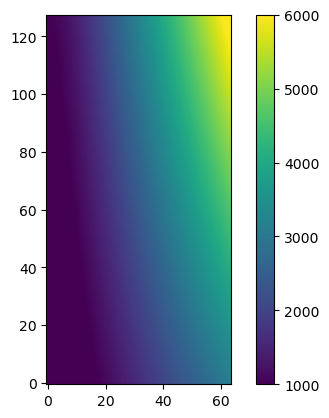

In [ ]:
plt.imshow(vector_map(curl_B), origin='lower', vmin=1000, vmax=6000)
plt.colorbar()

<matplotlib.colorbar.Colorbar>

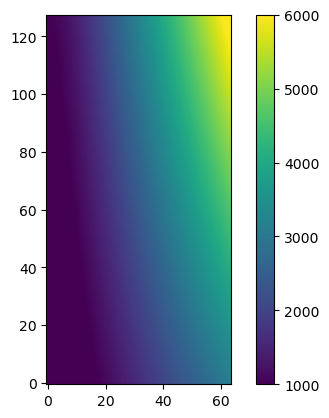

In [ ]:
plt.imshow(vector_map(curl_B_nu), origin='lower', vmin=1000, vmax=6000)
plt.colorbar()

$$
\nabla^2 B_x
$$

In [ ]:
Laplacian_Bx = laplacian_Bx(r)
Laplacian_Bx.sum(), Laplacian_Bx.shape

(6291455.999999998, (64, 128, 256))

In [ ]:
Laplacian_Bx_nu = laplacian(Bx, dx, dy, dz)
Laplacian_Bx_nu.sum(), Laplacian_Bx_nu.shape

(6291455.999999933, (64, 128, 256))

In [ ]:
np.allclose(Laplacian_Bx, Laplacian_Bx_nu, atol=1e-1)

True

$$
\nabla^2 B_y
$$

In [ ]:
Laplacian_By = laplacian_By(r)
Laplacian_By.sum(), Laplacian_By.shape

(-37748736.0, (64, 128, 256))

In [ ]:
Laplacian_By_nu = laplacian(By, dx, dy, dz)
Laplacian_By_nu.sum(), Laplacian_By_nu.shape

(-37748735.99999967, (64, 128, 256))

In [ ]:
np.allclose(Laplacian_By, Laplacian_By_nu, atol=1e-1)

True

$$
\nabla^2 B_z
$$

In [ ]:
Laplacian_Bz = laplacian_Bz(r)
Laplacian_Bz.sum(), Laplacian_Bz.shape

(0.0, (64, 128, 256))

In [ ]:
Laplacian_Bz_nu = laplacian(Bz, dx, dy, dz)
Laplacian_Bz_nu.sum(), Laplacian_Bz_nu.shape

(1.4653444568857287e-08, (64, 128, 256))

In [ ]:
np.allclose(Laplacian_Bz, Laplacian_Bz_nu, atol=1e-1)

True

$$
\nabla^2 \vec{B}
$$

In [ ]:
Laplacian_B = laplacian_mag(r)
Laplacian_B.sum(), Laplacian_B.shape

(-31457279.99999993, (64, 128, 256, 3))

In [ ]:
Laplacian_B_nu = laplacian_vector(B, dx, dy, dz)
Laplacian_B_nu.sum(), Laplacian_B_nu.shape

(-31457279.999999724, (64, 128, 256, 3))

In [ ]:
np.allclose(Laplacian_B, Laplacian_B_nu, atol=1e-1)

True

<matplotlib.colorbar.Colorbar>

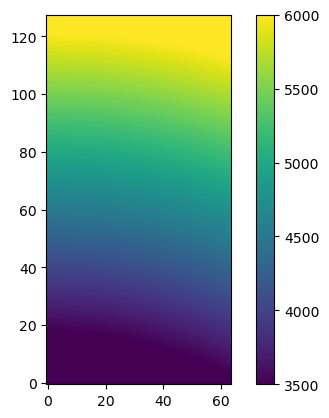

In [ ]:
plt.imshow(vector_map(Laplacian_B), origin='lower', vmin=3500, vmax=6000)
plt.colorbar()

<matplotlib.colorbar.Colorbar>

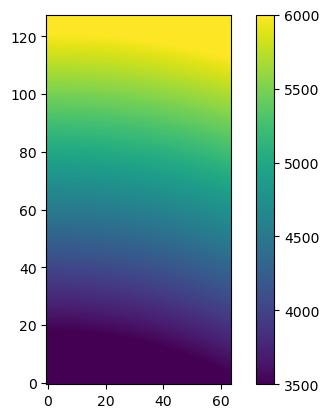

In [ ]:
plt.imshow(vector_map(Laplacian_B_nu), origin='lower', vmin=3500, vmax=6000)
plt.colorbar()